# Lab 3: Deep Sequence Modeling

## Deniz Rasouli Jambori (5307843)

The third lab session is about data that have a sequential structure that must be taken into account.

In [108]:
from __future__ import print_function
import tensorflow as tf
import os, json, re
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
from tensorflow.keras.layers import Dense
%matplotlib inline

# 3.1 Deal with sequential data
<img src="https://drive.google.com/uc?id=1k6HwtWlMTkVJFuyBpeBGF2sApqxR-KRc" width="600px" align="right"><br>
In this lab we see Deep Learning models that can process sequential data (text, timeseries,..).<br>
These models don’t take as input raw text: they only work with numeric tensors; **vectorizing** text is the process of transforming text into numeric tensors.<br><br><br>
The different units into which you can break down text (words, characters) are called tokens; then if you apply a tokenization scheme, you associate numeric vectors with the generated tokens.<br>
These vectors, packed into sequence tensors, are fed into Deep Neural Network.<br>
There are multiple ways to associate a vector with a token: we will see One-Hot Encoding and Token Embedding.<br>
In this section we are going to deal with:
* 3.1.1 One-Hot Encoding
* 3.1.2 Word embedding

## 3.1.1 One-Hot Encoding
One-Hot Encoding consists of associating a unique integer index with every word and then turning this integer index $i$ into a binary vector of size $N$ (the size of the vocabulary); the vector is all zeros except for the $i$-th entry, which is 1.
<img src="https://drive.google.com/uc?id=1OzK9t_WXQsaDuZoOTQSksLuNMubXm0gc" width="400px">

#### Try to perform One-Hot Encoding using Tokenizer
Keras provides the Tokenizer class for preparing text documents for DL.<br>
The Tokenizer must be constructed and then fit on either raw text documents or integer encoded text documents

In [ ]:
# define 4 documents
docs = ['Well done!','Good work','Great effort','nice work']

# create the tokenizer
tokenizer = Tokenizer()

# fit the tokenizer on the documents
tokenizer.fit_on_texts(docs)


encoded_docs = tokenizer.texts_to_matrix(docs, mode='count')
print(encoded_docs)

[[0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 1.]]


###  <font color="blueviolet">Analysis and Comments: <font color="navy"> Here we have 4 expression so our final output will consist of 4 vectors, and we have 8 tokens in total so each vector has 8 values which can be 1 or 0 according to the context of the expression that is store in that vector. For example we have "work" token twice, so as it can be seen in the second and forth vectors we have 1 value in the second column which probably indicate the word "work".

Some problems related to this kind of encoding are sparsity of the solution and the high dimensionality of the vector encoding of the tokens.

## 3.1.2 Word embedding
<img src="https://drive.google.com/uc?id=1YRcQ1_5n8Qay0GFoSLVrNcEKWeik5G3S" width="400px" align="right"><br>
The vector obtained from word embedding is dense and has lower dimensionality w.r.t One-Hot Encoding vector; the dimensionality of embedding space vector is an hyperparameter.<br>
There are two ways to obtain word embeddings:<br>
* May be learned jointly with the network
* May use pre-trained word vectors (Word2Vec, GloVe,..)


Word embeddings maps human language into a geometric space; in a reasonable embedding space synonyms are embedded into similar word vectors and the geometric distance between any two word vectors reflects the semantic distance between the associated words (words meaning different things are embedded at points far away from each other, whereas related words are closer).<br>
How good is a word-embedding space depends on the specific task.<br>
It is reasonable to learn a new embedding space with every new task: with backpropagation and Keras it reduces to learn the weights of the Embedding layer.

### Learning Word Embeddings with the embedding layer
#### Load imdb dataset
This dataset contains movies reviews from IMDB, labeled by sentiment(positive/negative); reviews have been preprocessed, and each review is encoded as a sequence of word indexes(integers).<br>
https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification

In [ ]:
max_features = 10000
maxlen = 50

imdb = tf.keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
x_val=tf.keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)


#### Show the size of vocabulary and the most frequent words

In [ ]:
word_to_index = imdb.get_word_index()

vocab_size = len(word_to_index)
print('Vocab size : ', vocab_size)


words_freq_list =words_freq_list = []
[]
for (k,v) in imdb.get_word_index().items():
    words_freq_list.append((k,v))

sorted_list = sorted(words_freq_list, key=lambda x: x[1])

print("50 most common words: \n")
print(sorted_list[0:50])

1654784/1641221 [==============================] - 0s 0us/step
Vocab size :  88584
50 most common words: 

[('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5), ('is', 6), ('br', 7), ('in', 8), ('it', 9), ('i', 10), ('this', 11), ('that', 12), ('was', 13), ('as', 14), ('for', 15), ('with', 16), ('movie', 17), ('but', 18), ('film', 19), ('on', 20), ('not', 21), ('you', 22), ('are', 23), ('his', 24), ('have', 25), ('he', 26), ('be', 27), ('one', 28), ('all', 29), ('at', 30), ('by', 31), ('an', 32), ('they', 33), ('who', 34), ('so', 35), ('from', 36), ('like', 37), ('her', 38), ('or', 39), ('just', 40), ('about', 41), ("it's", 42), ('out', 43), ('has', 44), ('if', 45), ('some', 46), ('there', 47), ('what', 48), ('good', 49), ('more', 50)]


###  <font color="blueviolet">Analysis and Comments: <font color="navy"> In this part we have a preview of IMDB data. for example as it can be seen we have 88584 words or tokens in our dataset and the most frequent word is "the".

In [ ]:
word_to_index['otherwise']

897

###  <font color="blueviolet">Analysis and Comments: <font color="navy"> In the above part we call a single word "otherwise", and want to know its index and as it can be seen we got 897 which shows the index of this word in the vocabulary.

# 3.2 Recurrent Neural Network
Here https://colah.github.io/posts/2015-08-Understanding-LSTMs/ you can find a clear explanation about RNNs and LSTMs; the following is a summary of the main concepts.


A major characteristic of some neural networks, as ConvNet, is that they have no memory: each input is processed independently, with no state kept in between inputs. Biological intelligence processes information incrementally while maintaining an internal model of what it’s processing, built from past information and constantly updated as new information comes in.<br>
A recurrent neural network (RNN) adopts the same principle but in an extremely simplified version: it processes sequences by iterating through the sequence elements and maintaining a state containing information relative to what it has seen so far.

<img src="https://drive.google.com/uc?id=1RaDXXygc0HJv6YyIAjU4_Nbw1bXzAhAJ" width="650px"><br>




Each input $x_{i=t-1, t, t+1, ..}$ is combined with the internal state and then is applied an activation function (e.g. $tanh$); then the output is computed $h_{i=t-1, t, t+1, ..}$ and the internal state is updated.<br>
In many cases, you just need the last output ($h_{i=last t}$ at the end of the loop), because it already contains information
about the entire sequence.
<img src="https://drive.google.com/uc?id=1RtulDLKQnzZTSbBsD2n7TIlRVEaESB8o" width="550px">


#### Create the model
In the following sections we will develop different models. Be careful to the fact that we are dealing with a binary classification problem!

###  <font color="blueviolet">Analysis and Comments: <font color="navy"> The point that we can consider for the binary classification problem is that we should put o a single neuron in the output part of the last Dense layer.

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 16))

# Complete the model, it should be made by at least:
# 1 SimpleRNN layer
model.add(tf.keras.Input(shape=(1000,)))
model.add(tf.keras.layers.SimpleRNN(64,activation="tanh"))
# 1 Dense layer
dense_layer = Dense(1,activation='sigmoid')
# Add the dense layer to the model
model.add(dense_layer)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

#### Train the model

In [ ]:
# Train your model here

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, batch_size=128)
_, train_acc = model.evaluate(x_train, y_train, verbose=1)
_, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/5
137/137 [==============================] - 14s 93ms/step - loss: 0.6482 - acc: 0.6121 - val_loss: 0.5535 - val_acc: 0.7629
Epoch 2/5
137/137 [==============================] - 13s 96ms/step - loss: 0.4440 - acc: 0.8045 - val_loss: 0.4838 - val_acc: 0.7757
Epoch 3/5
137/137 [==============================] - 13s 92ms/step - loss: 0.3451 - acc: 0.8548 - val_loss: 0.4264 - val_acc: 0.8077
Epoch 4/5
137/137 [==============================] - 12s 90ms/step - loss: 0.2835 - acc: 0.8847 - val_loss: 0.4597 - val_acc: 0.8025
Epoch 5/5
782/782 [==============================] - 7s 9ms/step - loss: 0.4981 - acc: 0.7997
Train: 0.951, Test: 0.800


### <font color="blueviolet">Comment and Analysis: <font color="navy"> For the single layer model, I will do some analysis by changing the batch size and epoches in order to compare what result we will get in terms of validation and train accuracy by changing these two parameters. An important point is about the number of epoches that we use for this model. I used 10,30 and 50 epoches, as I did for CNN and DNN, but I realized that RNN model tends to become overfitted sooner than the others so I cahnge my epoches to 1, 5 ,10 and 20 to have a better observation of the changes.

### <font color="navy"> Below there is the table that filled and help us to understand the variation of test and train accuracy which obtained by changing the batch size and number of epoches:

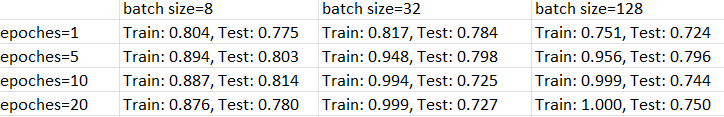

### <font color="navy"> First of all looking at this plot we can see that by increasing the number of epoches, our model will face an increasment in terms of train accuracy, in which we will have a nearly 100% accurately learning model by the 20th epoch. This showing an overfitting of our model cause in a real situation our model cannot learn 100% a=but in this simple model our architecture learn very fast due to the fact that we have only one layer and fewer number of parameters. So in the very first epoches our modle achieve its best and real accuracy but then from one point onwards even if the train improve, we can see that test accuracy reduces. For instance, with 5 epoches we will have the highst accuracy for both train and test sets but after that when we have 10 epoches, the train increased when we will see a decreasing trend for test set. This shows that with having 10 epoches our model passed its best performance point and entered an overfitted condition. Another point is the fact that by having batch size=8, our model can tolerate higher number of epoches in comparison to other batch sizes so I can conclude that for smaller batch sizes our model tend to reach to the overfitted condition later than the bigger batch sizes. In the above table for 5 epoches all the batch sizes reached the best performance and after that we will see reduction period while for batch size=8, the best performance is related to 10 epoches.Having said so, if I want to describe the effect of batch size that I understood I would say batch size impacts learning significantly. What happens when we put a batch through your network is that you average the gradients. The concept is that if your batch size is big enough, this will provide a stable enough estimate of what the gradient of the full dataset would be. By taking samples from your dataset, you estimate the gradient while reducing computational cost significantly. The lower you go, the less accurate your esttimate will be, however in some cases these noisy gradients can actually help escape local minima. When it is too low, your network weights can just jump around if your data is noisy and it might be unable to learn or it converges very slowly, thus negatively impacting total computation time.

In [ ]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

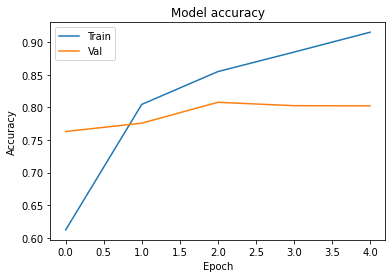

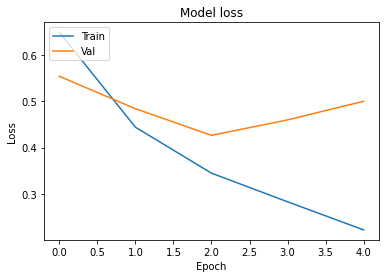

In [ ]:
plot_history(history)

#### Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy: %.3f, Test loss: %.3f' % (test_acc,test_loss))

782/782 [==============================] - 7s 9ms/step - loss: 0.4981 - acc: 0.7997
Test accuracy: 0.800, Test loss: 0.498


#### Try to build a new model where you stack several recurrent layers.
In such a setup, you have to get all of the intermediate layers to return full sequence of outputs. This is needed to return batch size, timesteps, hidden state. By doing this the output should contain all historical generated outputs along with time stamps (3D). This way the next layer can work further on the data.

In [ ]:
# Build the model. It should be made by at least:
# 1 Embedding layer
# More than 1 SimpleRNN layer, do not forget to put the return_sequences parameter to True 
# 1 Dense layer

multi_model = tf.keras.Sequential()
multi_model.add(tf.keras.layers.Embedding(max_features, 16))
# Complete the model, it should be made by at least:
# 1 SimpleRNN layer
multi_model.add(tf.keras.Input(shape=(1000,)))
multi_model.add(tf.keras.layers.SimpleRNN(16,activation="tanh",return_sequences=True))
multi_model.add(tf.keras.layers.SimpleRNN(16,activation="tanh",return_sequences=True))
multi_model.add(tf.keras.layers.SimpleRNN(16,activation="tanh",return_sequences=True))
# 1 Dense layer
dense_layer = Dense(1,activation='sigmoid')
multi_model.add(dense_layer)
multi_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

#### Train the model

###  <font color="blueviolet">Analysis and Comments: <font color="navy"> You should reshape your labels as 2d-tensor (the first dimension will be the batch dimension and the second the scalar label):

In [ ]:
# Train your model here
y_train_ = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test_ = np.asarray(y_test).astype('float32').reshape((-1,1))
y_val_ = np.asarray(y_val).astype('float32').reshape((-1,1))

second_history = multi_model.fit(x_train, y_train_, validation_data=(x_val, y_val_), epochs=5, batch_size=128)
_, train_acc = multi_model.evaluate(x_train, y_train_, verbose=1)
_, test_acc = multi_model.evaluate(x_test, y_test_, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/5
137/137 [==============================] - 38s 253ms/step - loss: 0.6313 - acc: 0.6244 - val_loss: 0.5750 - val_acc: 0.6885
Epoch 2/5
137/137 [==============================] - 32s 237ms/step - loss: 0.5190 - acc: 0.7329 - val_loss: 0.5597 - val_acc: 0.7059
Epoch 3/5
137/137 [==============================] - 34s 248ms/step - loss: 0.4760 - acc: 0.7629 - val_loss: 0.5600 - val_acc: 0.7079
Epoch 4/5
137/137 [==============================] - 33s 244ms/step - loss: 0.4521 - acc: 0.7779 - val_loss: 0.5615 - val_acc: 0.7085
Epoch 5/5
782/782 [==============================] - 15s 20ms/step - loss: 0.5756 - acc: 0.7014
Train: 0.813, Test: 0.701


### <font color="blueviolet">Comment and Analysis: <font color="navy"> I have run this model with with different epoches but as I increase the number of epoches ( above 5 for instance) the test accuracy is reducing to a great extend. So I prefered to use 5 epoches with a normal batch size which is 128 as I observed from previous model. In terms of the neurons that we should put in each layer, as I observed, when I increase the number of nodes in each layer, the plot that I obtained have great fluctuations so  I think making the model more complicated in terms of number of neurons is making it confused and it cannot have a stable performance spetially in the case of loss values.

In [ ]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(second_history.history['acc'])
    plt.plot(second_history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(second_history.history['loss'])
    plt.plot(second_history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

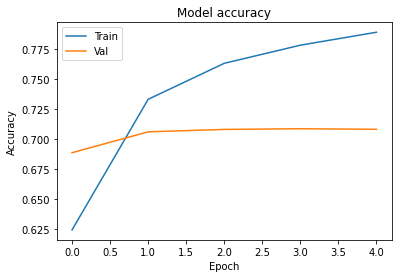

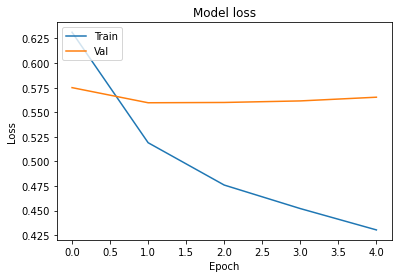

In [ ]:
plot_history(second_history)

### <font color="blueviolet">Comment and Analysis: <font color="navy"> The main form of this plot is the same for the previous one. As we increase the epoches we will have better train performance but the test accuracy first increase and then become stable until from one point onwards model overfittes and got more and more error and the accuracy of testing and validation decrease as well. In the case of loss again train loss reduce by the epoches increasment but the validation loss is some how stable in this case but if we have more epoches we can see that the loss in the case of validation will rise too.

#### Evaluate the model

**What can you say about the obtained results? What about the comparison between these results and the ones obtained in the single layer RNN?**


### <font color="blueviolet">Comment and Analysis: <font color="navy">As far as I observed, more layers can be better but also harder to train. As a general rule  1 hidden layer work with simple problems, like this, and two are enough to find reasonably complex features. All in all performance does not increase that much so we can opt to have a higher run time with more layers. I think having a single or maximum two layers can solve this problem with a less training and running time.

# 3.3 Transformers
<img src="https://media.arxiv-vanity.com/render-output/5487940/Figures/ModalNet-21.png" width="250px" align="right"><br>
One main drawback about RNNs is their capacity to remember long-term dependencies. To alleviate this problem different models have been proposed, like Long Short Term Memories (LSTM) and Transformers.<br>
*Transformers* is one of the best available model nowadays to deal with different kind of data (text, images..) and obtain state of the art results.

The key component in the Transformer architecture is the Attention layer, that helps the encoder look at other words in the input sentence as it encodes a specific word. The attention mechanism, in theory, and given enough compute resources, have a wider window to reference from, therefore being capable of using the **entire context** of the text.




#### Create Transformer model in TensorFlow

In [109]:
class TransformerBlock(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = tf.keras.layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = tf.keras.Sequential(
            [tf.keras.layers.Dense(ff_dim, activation="relu"), tf.keras.layers.Dense(embed_dim),]
        )
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [110]:
class TokenAndPositionEmbedding(tf.keras.layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = tf.keras.layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

# Build the model. It should be made by at least:
# 1 TokenAndPositionEmbedding layer with maxlen, vocab_size and embed_dim as arguments
# 1 TransformerBlock layer with embed_dim, num_heads and ff_dim as arguments
# 1 GlobalAveragePooling1D layer
# 2 Dense layers 

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(2, activation="softmax")(x)
transformers_model = keras.Model(inputs=inputs, outputs=outputs)

transformers_model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])




#### Train the model

In [ ]:
# Train your model here
third_history =  transformers_model.fit(x_train, y_train, batch_size=128, epochs=5, validation_data=(x_val, y_val))
_, train_acc = transformers_model.evaluate(x_train, y_train_, verbose=1)
_, test_acc = transformers_model.evaluate(x_test, y_test_, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))



Epoch 1/5
137/137 [==============================] - 5s 21ms/step - loss: 0.5295 - accuracy: 0.7226 - val_loss: 0.4251 - val_accuracy: 0.8017
Epoch 2/5
137/137 [==============================] - 3s 18ms/step - loss: 0.3423 - accuracy: 0.8562 - val_loss: 0.4278 - val_accuracy: 0.8028
Epoch 3/5
137/137 [==============================] - 3s 18ms/step - loss: 0.2703 - accuracy: 0.8938 - val_loss: 0.4709 - val_accuracy: 0.7987
Epoch 4/5
137/137 [==============================] - 2s 18ms/step - loss: 0.2293 - accuracy: 0.9133 - val_loss: 0.5094 - val_accuracy: 0.7953
Epoch 5/5
782/782 [==============================] - 5s 6ms/step - loss: 0.6046 - accuracy: 0.7824
Train: 0.961, Test: 0.782


In [ ]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(third_history.history['accuracy'])
    plt.plot(third_history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(third_history.history['loss'])
    plt.plot(third_history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

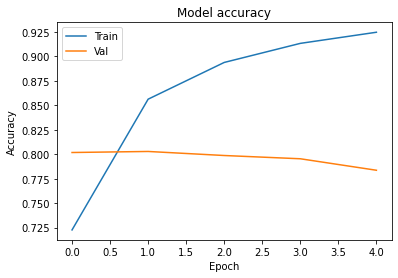

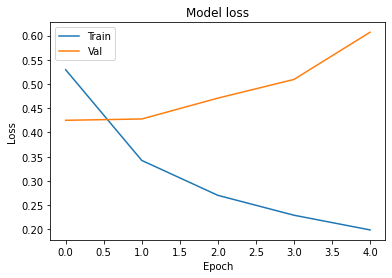

In [ ]:
plot_history(third_history)

#### Evaluate the model

In [ ]:
test_loss, test_acc = transformers_model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy: %.3f, Test loss: %.3f' % (test_acc,test_loss))

782/782 [==============================] - 5s 6ms/step - loss: 0.6046 - accuracy: 0.7824
Test accuracy: 0.782, Test loss: 0.605


### <font color="blueviolet">Comment and Analysis: <font color="navy">I observe that the Transformer training is in general more stable compared to the RNN, although it also seems to overfit more, and thus shows more problems with generalization. Also I think the transformers are faster than the RNN. Due to the parallelization ability of the transformer mechanism, much more data can be processed in the same amount of time with transformer models.

# 3.4 Reuters newswire classification dataset

The reuters newswire classification dataset is a dataset of 11,228 newswires from Reuters, labeled over 46 topics. More information about the dataset and how to use it can be found here:
https://keras.io/api/datasets/reuters/

Try to build a new model dealing with this new dataset.
Try to use both the RNN and the Transfomrers approach, and select the best of them. What do you expect will be the best? Be carefull that this domain shift will imply some changes in your code as it is not a binary classification problem anymore!

In [111]:
max_features = 10000
maxlen = 50

reuters = tf.keras.datasets.reuters
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.reuters.load_data(num_words=max_features,path="reuters.npz")
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)
num_classes = np.max(y_train) + 1
print(num_classes)

x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)
x_val  =   tf.keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen)

46


#### Create model

In [ ]:
# Build the model.
from keras.layers import Dense, Activation, Flatten
last_model = tf.keras.Sequential()
last_model.add(tf.keras.layers.Embedding(max_features, 1000))
# Complete the model, it should be made by at least:
# 1 SimpleRNN layer
last_model.add(tf.keras.Input(shape=(1000,)))
last_model.add(tf.keras.layers.SimpleRNN(256,activation="tanh",return_sequences=True))


# 1 Dense layer
dense_layer = Dense(46,activation='sigmoid')
last_model.add(dense_layer)
last_model.add(Flatten())
last_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

#### Train the model

In [ ]:
# Train your model here
y_train_ = np.asarray(y_train).astype('float32').reshape((-1,1))
y_test_ = np.asarray(y_test).astype('float32').reshape((-1,1))
y_val_ = np.asarray(y_val).astype('float32').reshape((-1,1))

forth_history = last_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=30, batch_size=128)
_, train_acc = last_model.evaluate(x_train, y_train, verbose=1)
_, test_acc = last_model.evaluate(x_test, y_test, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/30
50/50 [==============================] - 7s 92ms/step - loss: 4.4032 - acc: 0.3100 - val_loss: 2.5818 - val_acc: 0.3599
Epoch 2/30
50/50 [==============================] - 6s 116ms/step - loss: 2.2874 - acc: 0.4326 - val_loss: 2.3535 - val_acc: 0.4282
Epoch 3/30
50/50 [==============================] - 4s 85ms/step - loss: 1.9844 - acc: 0.4880 - val_loss: 2.3310 - val_acc: 0.4393
Epoch 4/30
50/50 [==============================] - 4s 86ms/step - loss: 1.7671 - acc: 0.5508 - val_loss: 2.3788 - val_acc: 0.4330
Epoch 5/30
50/50 [==============================] - 4s 85ms/step - loss: 1.6261 - acc: 0.5648 - val_loss: 2.4302 - val_acc: 0.4237
Epoch 6/30
50/50 [==============================] - 4s 86ms/step - loss: 1.5247 - acc: 0.5694 - val_loss: 2.4797 - val_acc: 0.4349
Epoch 7/30
50/50 [==============================] - 4s 84ms/step - loss: 1.4576 - acc: 0.5775 - val_loss: 2.5239 - val_acc: 0.4263
Epoch 8/30
50/50 [==============================] - 4s 83ms/step - loss: 1.4046 - 

In [ ]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(forth_history.history['acc'])
    plt.plot(forth_history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(forth_history.history['loss'])
    plt.plot(forth_history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

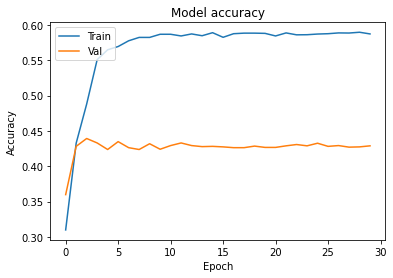

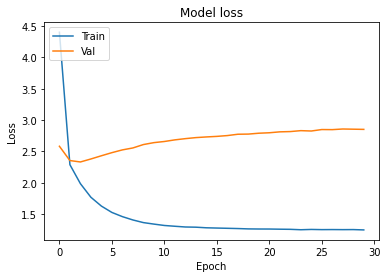

In [ ]:
plot_history(forth_history)

#### Evaluate the model

In [ ]:
test_loss, test_acc = last_model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy: %.3f, Test loss: %.3f' % (test_acc,test_loss))

71/71 [==============================] - 2s 23ms/step - loss: 2.9362 - acc: 0.4288
Test accuracy: 0.429, Test loss: 2.936


In [112]:
word_to_index = reuters.get_word_index()

vocab_size = len(word_to_index)
print('Vocab size : ', vocab_size)


Vocab size :  30979


In [113]:
from tensorflow import keras
from tensorflow.keras import layers
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

# Build the model. It should be made by at least:
# 1 TokenAndPositionEmbedding layer with maxlen, vocab_size and embed_dim as arguments
# 1 TransformerBlock layer with embed_dim, num_heads and ff_dim as arguments
# 1 GlobalAveragePooling1D layer
# 2 Dense layers 

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(46, activation="softmax")(x)
transformers_model_2 = keras.Model(inputs=inputs, outputs=outputs)

transformers_model_2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [114]:
# Train your model here
fifth_history =  transformers_model_2.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val, y_val))
_, train_acc = transformers_model_2.evaluate(x_train, y_train_, verbose=1)
_, test_acc = transformers_model_2.evaluate(x_test, y_test_, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/10
50/50 [==============================] - 3s 24ms/step - loss: 2.5238 - accuracy: 0.3879 - val_loss: 2.0077 - val_accuracy: 0.4920
Epoch 2/10
50/50 [==============================] - 1s 17ms/step - loss: 1.8006 - accuracy: 0.5454 - val_loss: 1.6903 - val_accuracy: 0.5770
Epoch 3/10
50/50 [==============================] - 1s 18ms/step - loss: 1.4742 - accuracy: 0.6443 - val_loss: 1.5052 - val_accuracy: 0.6315
Epoch 4/10
50/50 [==============================] - 1s 17ms/step - loss: 1.1922 - accuracy: 0.7067 - val_loss: 1.4013 - val_accuracy: 0.6638
Epoch 5/10
50/50 [==============================] - 1s 17ms/step - loss: 0.9361 - accuracy: 0.7655 - val_loss: 1.4054 - val_accuracy: 0.6686
Epoch 6/10
50/50 [==============================] - 1s 17ms/step - loss: 0.7411 - accuracy: 0.8141 - val_loss: 1.4203 - val_accuracy: 0.6824
Epoch 7/10
50/50 [==============================] - 1s 17ms/step - loss: 0.5846 - accuracy: 0.8494 - val_loss: 1.4799 - val_accuracy: 0.6868
Epoch 8/10
50

In [115]:
def plot_history(history):
    # Plot training & validation accuracy values
    plt.plot(fifth_history.history['accuracy'])
    plt.plot(fifth_history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(fifth_history.history['loss'])
    plt.plot(fifth_history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

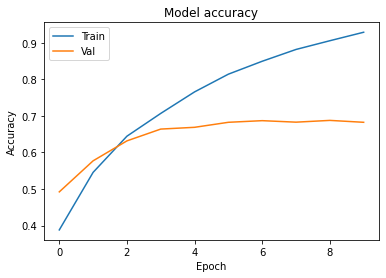

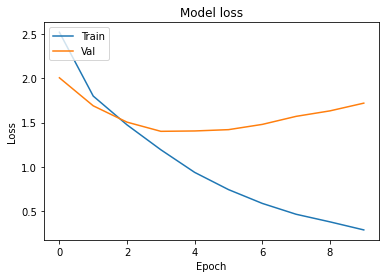

In [116]:
plot_history(fifth_history)

**Are the results accordant to what you expected? Can you notice some differences between the RNN and the LSTM results? Why?**

### <font color="blueviolet">Comment and Analysis: <font color="navy"> As it can be seen from the above part, transformer model has a significantly higher accuracy and better result on our date in comparison with the normal RNN. There is a point about RNN, and that is the fact that as I increased the number of layers in RNN, the performance did not increase and sometimes even it is tend to reduce the accuracy that I obtain by this model. This maybe shows that with simple one layer RNN we can interpret the data better as I mentioned in detail in the above parts. Another point to consider is about the number of neurons that I put in each layer. In the first data with only 8,16 neurons my model was able to learn but as this reuters data is bigger and more complecate than the first data and the problem is not binary classification, I used higher number of neurons (256 in this code) to achieve a better result. But all in all you can see that my model was not able to give the accuracy better than nearly 45% in the test data.On the other hand, looking at transformer model, we can see that this model has an acceptable accuracy on the rueters dataset with X% for test data. The reason why is that transformers are better than all the other architectures because they totally avoid recursion, by processing sentences as a whole and by learning relationships between words thanks to multi-head attention mechanisms and positional embeddings. For transformer model, due to its design can allow both data and model parallel training, the transformer is much more efficient than recurrent neural network such as LSTM. At the same time, the encoder-decoder architecture is also proposed to balance the effect and efficiency.